In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt
from numpy import sqrt, cosh, cos, sinh

from src.utils.root2df import Root2Df

In [2]:
res = Root2Df(data_dir=Path('./data/raw')).read_df()
res.keys()

[INFO] Reading skim configuration file: data\raw\processing.cfg
[INFO] data\raw\MinBiasPU200_MTD.root loaded!
[INFO] data\raw\DsTau3muPU0_Private.root loaded!
[INFO] data\raw\DsTau3muPU200_MTD.root loaded!


dict_keys(['MinBiasPU200_MTD', 'DsTau3muPU0_Private', 'DsTau3muPU200_MTD'])

In [3]:
neg = res['MinBiasPU200_MTD']
pos0 = res['DsTau3muPU0_Private']
pos200 = res['DsTau3muPU200_MTD']

In [4]:
len(neg), len(pos0), len(pos200)

(499600, 99894, 100000)

In [5]:
pos0 = pos0[pos0.n_gen_tau == 1]
pos200 = pos200[pos200.n_gen_tau == 1]

In [6]:
len(neg), len(pos0), len(pos200)

(499600, 77595, 77883)

In [30]:
neg.describe()

,n_mu_hit
count,100000.000000
mean,20.369240
std,11.254769
min,0.000000
25%,12.000000
50%,18.000000
75%,27.000000
max,110.000000


In [31]:
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999
neg.head()

,n_mu_hit,mu_hit_endcap,mu_hit_station,mu_hit_ring,mu_hit_sector,mu_hit_subsector,mu_hit_chamber,mu_hit_cscid,mu_hit_bx,mu_hit_type,mu_hit_neighbor,mu_hit_strip,mu_hit_wire,mu_hit_roll,mu_hit_quality,mu_hit_pattern,mu_hit_bend,mu_hit_sim_phi,mu_hit_sim_theta,mu_hit_sim_eta,mu_hit_sim_r,mu_hit_sim_z
entry,,,,,,,,,,,,,,,,,,,,,,
0,17,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1]","[1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1]","[1, 2, 2, 2, 2, 2, 2, 3, 5, 6, 1, 2, 3, 3, 4, 4, 6]","[0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0]","[4, 7, 7, 12, 12, 4, 12, 7, 16, 16, 4, 4, 18, 20, 23, 20, 18]","[3, 3, 3, 4, 4, 3, 7, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[4, 3, 4, 1, 2, 4, 2, 3, 4, 4, 4, 4, 1, 1, 1, 1, 4]","[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]","[372, 361, 640, 116, 7, 372, 7, 361, 526, 526, 480, 480, 80, 12, 68, 12, 651]","[-99, -99, -99, 7, -99, -99, -99, -99, -99, -99, -99, -99, 3, 7, 3, 7, -99]","[14, 1, 2, -99, 3, 14, 3, 1, 14, 14, 14, 14, -99, -99, -99, -99, 11]","[4, 2, 4, 4, 1, 4, 1, 2, 4, 4, 4, 4, 5, 5, 4, 5, 5]","[0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 4, 4, 0]","[33, -99, -60, 31, -99, 33, -99, -99, -84, -84, 83, 83, -16, -32, -32, -32, -29]","[60.30256, 115.76586, 113.28259, 112.534706, 112.979836, 60.30256, 107.02649, 115.76586, -63.743744, -63.743744, 62.537193, 62.537193, 166.38872, -165.94212, -142.16267, -165.94212, -12.997323]","[7.024292, 21.46307, 13.427252, 23.394432, 24.54635, 7.024292, 20.15554, 21.46307, 7.039067, 7.039067, 172.96898, 172.96898, 169.09969, 167.03917, 169.47531, 167.03917, 171.21321]","[2.790746, 1.6632497, 2.1394963, 1.5748464, 1.5253502, 2.790746, 1.7275075, 1.6632497, 2.7886398, 2.7886398, -2.7897866, -2.7897866, -2.3495607, -2.1751657, -2.384833, -2.1751657, -2.5661626]","[66.16643, 312.96072, 128.20139, 295.85043, 317.37912, 66.16643, 356.32977, 312.96072, 66.30701, 66.30701, 66.23043, 66.23043, 112.929276, 134.9747, 114.39374, 134.9747, 83.00519]","[537.0, 796.0012, 537.0, 683.85236, 694.9346, 537.0, 970.8, 796.0012, 537.0, 537.0, -537.0, -537.0, -586.41644, -586.4688, -615.7326, -586.4688, -537.0]"
1,18,"[1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1]","[2, 3, 3, 3, 4, 4, 4, 1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 6]","[0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2]","[8, 11, 9, 8, 23, 11, 11, 3, 2, 10, 14, 14, 9, 14, 14, 13, 13, 2]","[1, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[4, 4, 4, 4, 1, 4, 4, 4, 3, 3, 1, 1, 1, 1, 1, 4, 4, 3]","[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]","[576, 740, 735, 576, 18, 372, 740, 516, 78, 100, 86, 58, 92, 86, 58, 672, 672, 78]","[-99, -99, -99, -99, 3, -99, -99, -99, -99, -99, 12, 12, 27, 12, 12, -99, -99, -99]","[14, 12, 13, 14, -99, 13, 12, 10, 6, 7, -99, -99, -99, -99, -99, 13, 13, 6]","[5, 6, 5, 5, 4, 4, 6, 4, 2, 1, 5, 4, 6, 5, 4, 4, 4, 2]","[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 8, 4, 10, 8, 4, 0, 0, 0]","[-84, -12, -11, -84, -16, 73, -12, 103, -99, -99, -16, -27, -2, -16, -27, 57, 57, -99]","[134.94858, -169.29683, 150.83134, 134.94858, -143.28792, -159.69745, -169.29683, 43.481697, 10.900708, 89.76156, 128.124, 128.92888, 163.2656, 128.124, 128.92888, -112.45369, -112.45369, 10.900708]","[7.051308, 7.934151, 7.9313025, 7.051308, 10.423433, 7.831342, 7.934151, 171.26187, 164.23016, 165.40529, 166.34566, 166.23337, 167.37799, 166.34566, 166.23337, 172.10121, 172.10121, 164.23016]","[2.7868977, 2.6685982, 2.6689582, 2.7868977, 2.3945544, 2.6816816, 2.6685982, -2.5717366, -1.9769338, -2.0552866, -2.1225677, -2.1142988, -2.2018766, -2.1225677, -2.1142988, -2.6730788, -2.6730788, -1.9769338]","[66.42349, 74.84117, 74.81396, 66.42349, 113.269775, 73.85914, 74.84117, 82.53835, 159.66187, 147.21191, 142.44106, 143.6

In [32]:
pos0.describe()

,n_gen_tau,n_gen_mu,n_mu_hit
count,99894.000000,99894.000000,99894.000000
mean,1.252488,3.757463,6.618736
std,0.504013,1.512040,8.053073
min,1.000000,3.000000,0.000000
25%,1.000000,3.000000,1.000000
50%,1.000000,3.000000,3.000000
75%,1.000000,3.000000,10.000000
max,5.000000,15.000000,92.000000


In [33]:
pos0.head()

,n_gen_tau,n_gen_mu,n_mu_hit,gen_mu_pt,gen_mu_eta,gen_mu_phi,gen_mu_charge,gen_mu_gentauidx,gen_tau_pt,gen_tau_eta,gen_tau_phi,gen_tau_e,gen_tau_charge,mu_hit_endcap,mu_hit_station,mu_hit_ring,mu_hit_sector,mu_hit_subsector,mu_hit_chamber,mu_hit_cscid,mu_hit_bx,mu_hit_type,mu_hit_neighbor,mu_hit_strip,mu_hit_wire,mu_hit_roll,mu_hit_quality,mu_hit_pattern,mu_hit_bend,mu_hit_sim_phi,mu_hit_sim_theta,mu_hit_sim_eta,mu_hit_sim_r,mu_hit_sim_z
entry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,3,0,"[1.3261358, 0.4904044, 0.3330209]","[3.2381935, 2.5985863, 2.7364113]","[0.72255284, 2.84092, 0.45291144]","[-1, -1, 1]","[0, 0, 0]",[1.4303964],[3.4590425],[0.95534897],[22.82543],[-1],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
1,1,3,11,"[1.9961959, 0.4557597, 0.34302697]","[-2.2963645, -2.8297894, -3.8737035]","[-1.6872848, -1.689285, -0.8964417]","[-1, -1, 1]","[0, 0, 0]",[2.7041242],[-2.7893538],[-1.5973147],[22.1532],[-1],"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]","[1, 1, 2, 1, 2, 2, 3, 3, 4, 4, 4]","[4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[29, 29, 15, 15, 15, 15, 15, 15, 15, 15, 15]","[3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 3, 4, 1, 1, 1, 2, 1, 1, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[27, 27, 202, 389, 73, 84, 83, 48, 79, 79, 50]","[3, 2, -99, -99, 14, 14, 14, -99, 16, 15, -99]","[-99, -99, 7, 5, -99, -99, -99, 4, -99, -99, 4]","[6, 6, 1, 6, 6, 5, 6, 3, 4, 4, 4]","[8, 8, 0, 0, 10, 4, 9, 0, 9, 9, 0]","[-8, -8, -99, 54, -3, -24, 4, -99, 5, 5, -99]","[-77.72076, -77.72018, -74.42468, -79.8553, -74.21509, -75.54872, -74.48309, -74.89519, -75.01584, -75.016045, -75.419266]","[169.0234, 169.31248, 168.0201, 168.01, 168.70897, 168.70955, 168.51987, 168.17276, 168.24881, 168.33337, 168.03583]","[-2.3425446, -2.369392, -2.254491, -2.2536411, -2.3141215, -2.3141737, -2.2974024, -2.267409, -2.273906, -2.281178, -2.255814]","[119.422844, 116.20328, 168.90352, 114.045074, 167.6397, 167.62805, 187.67009, 201.97314, 210.8395, 209.27982, 223.55685]","[-615.72046, -615.7236, -796.0012, -537.0, -839.6384, -839.62494, -924.0677, -964.5, -1013.5448, -1013.5466, -1054.995]"
2,1,3,10,"[2.1674669, 1.2858303, 0.16846709]","[2.1274395, 1.9420229, 0.74140656]","[-0.6423708, -0.9001502, -2.1397717]","[-1, -1, 1]","[0, 0, 0]",[3.458886],[2.0705128],[-0.7862117],[14.043535],[-1],"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 2, 1, 1, 2, 3, 3, 4, 4]","[4, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","[1, 1, 0, 2, 0, 0, 0, 0, 0, 0]","[35, 35, 18, 1, 18, 18, 18, 18, 18, 18]","[3, 3, 2, 2, 2, 2, 2, 2, 2, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 3, 3, 1, 4, 1, 1, 2, 1, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[78, 56, 248, 74, 337, 105, 45, 70, 48, 67]","[9, -99, -99, 17, -99, 29, 35, -99, 35, -99]","[-99, 8, 6, -99, 2, -99, -99, 3, -99, 3]","[5, 2, 1, 5, 6, 6, 5, 3, 6, 1]","[9, 0, 0, 3, 0, 10, 10, 0, 8, 0]","[10, -99, -99, 31, 54, 5, 2, -99, -1, -99]","[-16.612978, -17.934393, -11.907164, 0.9837006, -18.776802, -11.5351715, -10.4672365, -10.509438, -10.866856, -11.119697]","[12.863422, 13.407759, 13.755832, 14.763183, 13.341312, 13.220131, 13.165869, 13.414619, 13.07025, 13.318735]","[2.1827736, 2.1409626, 2.1150918, 2.0436835, 2.145976, 2.155183, 2.1593328, 2.1404464, 2.1666856, 2.1476853]","[140.6137, 135.39111, 194.27798, 162.27092, 127.35033, 191.45854, 221.90012, 231.08582, 241.11494, 250.79616]","[615.75775, 567.97125, 793.59875, 615.7727, 537.0, 814.9995, 948.6175, 968.9, 1038.5723, 1059.395]"
3,1,3,14,"[1.2961711, 1.1655244, 2.072843]","[1.4696344, 1.2817779, 1.8989797]","[-2.0093365, -1.3892938, -1.4018095]","[-1, -1, 1]","[0, 0, 0]",[4.363222],[1.6861544],[-1.5688192],[12.310819],[-1],"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 2, 3, 3, 4, 4, 1, 1, 2, 3, 3, 4, 4]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5]","[0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]","[14, 26, 13, 13

In [34]:
pos200.describe()

,n_gen_tau,n_gen_mu,n_mu_hit
count,100000.000000,100000.00000,100000.00000
mean,1.250340,3.75102,27.17978
std,0.503003,1.50901,14.16115
min,1.000000,3.00000,0.00000
25%,1.000000,3.00000,17.00000
50%,1.000000,3.00000,25.00000
75%,1.000000,3.00000,35.00000
max,6.000000,18.00000,137.00000


In [35]:
pos200.head()

,n_gen_tau,n_gen_mu,n_mu_hit,gen_mu_pt,gen_mu_eta,gen_mu_phi,gen_mu_charge,gen_mu_gentauidx,gen_tau_pt,gen_tau_eta,gen_tau_phi,gen_tau_e,gen_tau_charge,mu_hit_endcap,mu_hit_station,mu_hit_ring,mu_hit_sector,mu_hit_subsector,mu_hit_chamber,mu_hit_cscid,mu_hit_bx,mu_hit_type,mu_hit_neighbor,mu_hit_strip,mu_hit_wire,mu_hit_roll,mu_hit_quality,mu_hit_pattern,mu_hit_bend,mu_hit_sim_phi,mu_hit_sim_theta,mu_hit_sim_eta,mu_hit_sim_r,mu_hit_sim_z
entry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,3,25,"[2.0428188, 0.9997989, 0.27055946]","[-1.7723093, -1.6097546, -3.3785052]","[-1.177515, -1.2215215, -1.5978823]","[-1, -1, 1]","[0, 0, 0]",[3.2922764],[-2.0207233],[-1.2244291],[12.760625],[-1],"[1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1]","[1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 4]","[2, 5, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6]","[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2]","[6, 15, 11, 11, 5, 7, 6, 7, 21, 21, 24, 11, 25, 29, 29, 30, 32, 32, 33, 1, 17, 1, 17, 32, 32]","[2, 2, 3, 3, 1, 3, 2, 3, 1, 1, 1, 1, 2, 3, 3, 1, 3, 3, 1, 2, 1, 2, 1, 3, 3]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[4, 4, 1, 1, 4, 4, 2, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[69, 267, 122, 54, 712, 316, 179, 316, 75, 69, 40, 358, 120, 27, 9, 81, 56, 29, 161, 109, 306, 19, 40, 56, 29]","[-99, -99, 0, 0, -99, -99, -99, -99, 6, 6, 30, -99, 35, 6, 6, 10, 43, 43, -99, -99, -99, 23, 75, 43, 43]","[10, 14, -99, -99, 13, 11, 1, 11, -99, -99, -99, 14, -99, -99, -99, -99, -99, -99, 3, 2, 4, -99, -99, -99, -99]","[5, 4, 5, 3, 4, 6, 2, 6, 6, 5, 4, 5, 5, 3, 5, 6, 6, 5, 1, 2, 2, 6, 6, 6, 5]","[0, 0, 9, 6, 0, 0, 0, 0, 5, 4, 3, 0, 4, 10, 7, 3, 10, 9, 0, 0, 0, 8, 9, 10, 9]","[27, -79, 6, -24, 0, 32, -99, 32, 27, -26, 0, -35, -22, -8, 18, 25, -4, 12, -99, -99, -99, -6, 6, -4, 12]","[108.21748, -76.93788, 95.04306, 99.27439, 88.57795, 118.224686, 96.32338, 118.224686, -163.1675, -162.27844, -129.29437, -160.67085, -124.70644, -76.907814, -75.721436, -73.80704, -49.347744, -47.90908, -36.533573, 0.7417797, -28.723944, 3.7739036, -29.795704, -49.347744, -47.90908]","[8.811322, 7.0341377, 171.0487, 170.72478, 172.08128, 171.27362, 162.89105, 171.27362, 168.74544, 168.66139, 160.8912, 172.97533, 161.28442, 168.05232, 167.90259, 167.12744, 157.41829, 157.09341, 160.94118, 159.5948, 163.08205, 163.11394, 162.35631, 157.41829, 157.09341]","[2.563363, 2.789342, -2.5475385, -2.5118399, -2.6705523, -2.5730882, -1.8943027, -2.5730882, -2.317378, -2.3098888, -1.7818953, -2.7906919, -1.8030708, -2.2572045, -2.2446582, -2.182057, -1.6111708, -1.5965041, -1.7845634, -1.7149358, -1.9056963, -1.9076102, -1.8630491, -1.6111708, -1.5965041]","[83.24066, 66.26011, 96.96937, 100.559906, 74.69364, 82.42557, 326.0937, 82.42557, 122.507515, 123.44711, 203.1473, 66.170044, 208.60114, 130.28592, 131.96924, 133.99266, 243.83885, 247.72385, 196.22064, 211.28532, 242.11607, 186.89406, 267.10187, 243.83885, 247.72385]","[537.0, 537.0, -615.6267, -615.75195, -537.0, -537.0, -1059.395, -537.0, -615.6307, -615.6328, -586.36304, -537.0, -615.7344, -615.71136, -615.7174, -586.33264, -586.31274, -586.2563, -567.97125, -567.97125, -796.0012, -615.679, -839.789, -586.31274, -586.2563]"
1,1,3,14,"[0.97261924, 0.05247818, 1.0819696]","[-2.8086803, -4.546069, -2.2002048]","[1.8097755, 2.2163248, -3.009095]","[-1, -1, 1]","[0, 0, 0]",[1.5787928],[-2.9692059],[2.5776076],[15.517232],[-1],"[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]","[1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4]","[1, 1, 2, 2, 3, 4, 4, 5, 6, 2, 2, 2, 3, 3]","[0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1]","[2, 8, 10, 8, 10, 26, 10, 26, 18, 5, 13, 6, 15, 16]","[1, 3, 2, 3,

In [11]:
m = 0.10563

def square_mij(pt_i, pt_j, eta_i, eta_j, phi_i, phi_j):
    first_term = 2 * m**2
    second_term = 2 * sqrt(m**2 + pt_i**2 * cosh(eta_i)**2) * sqrt(m**2 + pt_j**2 * cosh(eta_j)**2)
    third_term = -2 * pt_i * pt_j * (sinh(eta_i) * sinh(eta_j) + cos(phi_i - phi_j))
    return first_term + second_term + third_term

def square_M3mu(sq_m12, sq_m23, sq_m13):
    return sq_m12 + sq_m23 + sq_m13 - 3 * m**2

def invariant_mass(pts, etas, phis):
    pt1, pt2, pt3 = pts
    eta1, eta2, eta3 = etas
    phi1, phi2, phi3 = phis

    sq_m12 = square_mij(pt1, pt2, eta1, eta2, phi1, phi2)
    sq_m23 = square_mij(pt2, pt3, eta2, eta3, phi2, phi3)
    sq_m13 = square_mij(pt1, pt3, eta1, eta3, phi1, phi3)


    return sqrt(square_M3mu(sq_m12, sq_m23, sq_m13))

pts = [1.65537, 1.49084, 0.518967]
etas = [1.59946, 1.46433, 1.73268]
phis = [-2.61596, -2.65651, -1.17203]

assert abs(invariant_mass(pts, etas, phis) - 1.77682) < 1e-4

In [12]:
def invariant_mass_check(df):
    errs = []
    for i in tqdm(range(len(df))):
        if df.gen_mu_pt[i].shape == (3,):
            idx = (df.gen_mu_pt[i] * -1).argsort()
            mass = invariant_mass(df.gen_mu_pt[i][idx], df.gen_mu_eta[i][idx], df.gen_mu_phi[i][idx])

            err = abs(mass - 1.7768)
            assert err < 1e-1
            errs.append(err)
    print(np.mean(errs))

In [13]:
invariant_mass_check(pos0)

100%|██████████| 99894/99894 [00:07<00:00, 12917.30it/s]

1.7228825982743192e-05


In [14]:
invariant_mass_check(pos200)

100%|██████████| 100000/100000 [00:08<00:00, 12120.32it/s]

1.738665511082083e-05


In [66]:
def station_check(df):

    max_consec_dist = []
    hits_dist = {i: [] for i in range(1, 5)}
    for i in tqdm(range(len(df))):
        stat_info = df.iloc[i].mu_hit_station
        if stat_info.shape == (0,):
            continue
            
        uniq_station, uniq_counts = np.unique(stat_info, return_counts=True)
        max_consec_stat = 0
        for i in range(uniq_station.shape[0]):
            if uniq_station[i] == i + 1:
                max_consec_stat += 1
            hits_dist[uniq_station[i]].append(uniq_counts[i])
        max_consec_dist.append(max_consec_stat)
        
    return max_consec_dist, hits_dist

In [67]:
max_consec_dist_neg, hits_dist_neg = station_check(neg)

100%|████████████████████████████████████████████████████████████████████████| 499600/499600 [01:09<00:00, 7166.02it/s]


In [68]:
max_consec_dist_pos, hits_dist_pos = station_check(pos200)

100%|██████████████████████████████████████████████████████████████████████████| 77883/77883 [00:11<00:00, 6784.42it/s]


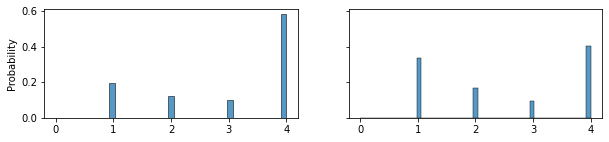

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
sns.histplot(max_consec_dist_pos, ax=ax[0], stat='probability')
sns.histplot(max_consec_dist_neg, ax=ax[1], stat='probability')
fig.show()

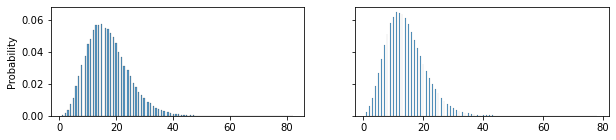

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
sns.histplot(hits_dist_pos[1], ax=ax[0], stat='probability')
sns.histplot(hits_dist_neg[1], ax=ax[1], stat='probability')
fig.show()

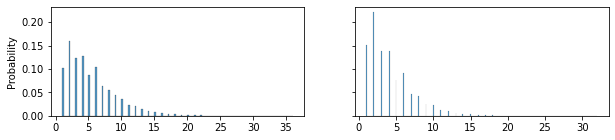

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
sns.histplot(hits_dist_pos[2], ax=ax[0], stat='probability')
sns.histplot(hits_dist_neg[2], ax=ax[1], stat='probability')
fig.show()

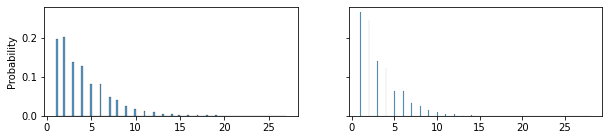

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
sns.histplot(hits_dist_pos[3], ax=ax[0], stat='probability')
sns.histplot(hits_dist_neg[3], ax=ax[1], stat='probability')
fig.show()

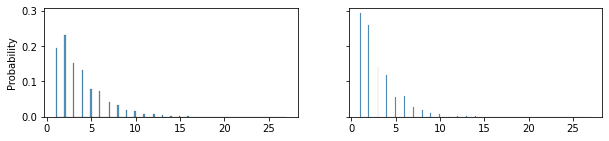

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
sns.histplot(hits_dist_pos[4], ax=ax[0], stat='probability')
sns.histplot(hits_dist_neg[4], ax=ax[1], stat='probability')
fig.show()

In [7]:
mu_pt_pos200 = []
for each in pos200.gen_mu_pt:
    mu_pt_pos200.append(sorted(each, reverse=True))
mu_pt_pos200 = np.stack(mu_pt_pos200)

In [8]:
mu_pt_pos0 = []
for each in pos0.gen_mu_pt:
    mu_pt_pos0.append(sorted(each, reverse=True))
mu_pt_pos0 = np.stack(mu_pt_pos0)

In [32]:
print(stats.describe(mu_pt_pos0[:, 0]))
print(stats.describe(mu_pt_pos200[:, 0]))

DescribeResult(nobs=77595, minmax=(0.25869974, 61.456043), mean=2.266893, variance=2.855617, skewness=4.586782932281494, kurtosis=61.17325364988022)
DescribeResult(nobs=77883, minmax=(0.20445968, 63.89015), mean=2.243286, variance=2.7570355, skewness=4.429652690887451, kurtosis=56.8560689005039)


In [33]:
print(stats.describe(mu_pt_pos0[:, 1]))
print(stats.describe(mu_pt_pos200[:, 1]))

DescribeResult(nobs=77595, minmax=(0.041924037, 32.065815), mean=1.2453474, variance=0.78917414, skewness=3.7535369396209717, kurtosis=42.518710870699266)
DescribeResult(nobs=77883, minmax=(0.045099936, 45.765274), mean=1.2313828, variance=0.77055967, skewness=4.951228618621826, kurtosis=114.48307587991864)


In [34]:
print(stats.describe(mu_pt_pos0[:, 2]))
print(stats.describe(mu_pt_pos200[:, 2]))

DescribeResult(nobs=77595, minmax=(0.0013745284, 10.826024), mean=0.5397817, variance=0.22954665, skewness=3.4417243003845215, kurtosis=26.284952491983056)
DescribeResult(nobs=77883, minmax=(0.00020816192, 15.659953), mean=0.5354514, variance=0.22538687, skewness=3.6231749057769775, kurtosis=34.27403074794236)


<ipython-input-17-c05dd1975112>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


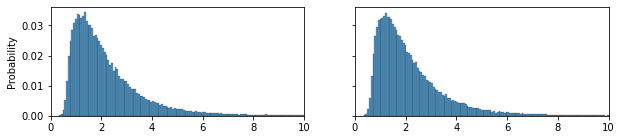

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
ax[0].set_xlim(0, 10)
ax[1].set_xlim(0, 10)
sns.histplot(mu_pt_pos0[:, 0], ax=ax[0], stat='probability')
sns.histplot(mu_pt_pos200[:, 0], ax=ax[1], stat='probability')
fig.show()

<ipython-input-18-2357610d1372>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


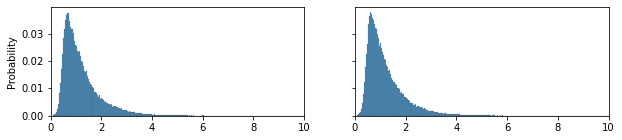

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
ax[0].set_xlim(0, 10)
ax[1].set_xlim(0, 10)
sns.histplot(mu_pt_pos0[:, 1], ax=ax[0], stat='probability')
sns.histplot(mu_pt_pos200[:, 1], ax=ax[1], stat='probability')
fig.show()

<ipython-input-19-310565bbbff2>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


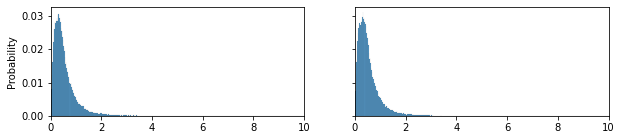

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
ax[0].set_xlim(0, 10)
ax[1].set_xlim(0, 10)
sns.histplot(mu_pt_pos0[:, 2], ax=ax[0], stat='probability')
sns.histplot(mu_pt_pos200[:, 2], ax=ax[1], stat='probability')
fig.show()